### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn

#### Import data

In [2]:
data = pd.read_csv('../ML1/arbres_grenoble_epsg4326.csv')

In [3]:
data.head(5)

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,5259,ESP11324,AR11324,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175673908288694,5.749421158918044"
1,1478,ESP27796,AR27796,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175689031385716,5.749449836814956"
2,13139,ESP4323,AR4323,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Libre,Métropole de Grenoble,NaN,Libre,"45.175403375194556,5.748482643586666"
3,24132,ESP7132,AR7132,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,NaN,"45.17542427590123,5.748557574259692"
4,23970,ESP15162,AR15162,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP625,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,NaN,Ville de Grenoble,NaN,NaN,"45.17760812265083,5.749356960358159"


In [4]:
data.columns

Index(['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement', 'equipe',
       'remarques', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'courrier', 'identifiantplu',
       'typeimplantationplu', 'intituleprotectionplu', 'anneeabattage',
       'essouchement', 'diametrearbre', 'causeabattage', 'collectivite',
       'stationmetro', 'hauteurarbre', 'portarbre', 'structure', 'forme',
       'typenature', 'geo_point_2d'],
      dtype='object')

Variable 'annee de plantation'

In [5]:
#garder la variable initiale 'data' sans aucun changement
arbres_gre = data

In [6]:
arbres_gre.describe()

,elem_point_id,adr_secteur,equipe,anneedeplantation,courrier,identifiantplu,anneeabattage,essouchement,diametrearbre,causeabattage
count,31736.000000,31736.000000,0.0,30144.000000,0.0,600.000000,0.0,0.0,0.0,0.0
mean,20393.645544,3.826758,NaN,1990.018644,NaN,87.856667,NaN,NaN,NaN,NaN
std,12759.662993,1.718467,NaN,17.992314,NaN,60.657935,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1900.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,9656.750000,2.000000,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN
50%,19424.500000,4.000000,NaN,1987.000000,NaN,70.000000,NaN,NaN,NaN,NaN
75%,29254.250000,5.000000,NaN,2006.000000,NaN,70.000000,NaN,NaN,NaN,NaN
max,46807.000000,6.000000,NaN,2022.000000,NaN,358.000000,NaN,NaN,NaN,NaN


In [7]:
# identifying the existence of nan values or non numeric (.info())
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970.,   nan, 1995., 2022., 1993., 1988., 1980.,
       2005., 2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955.,
       1981., 1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012.,
       1992., 1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002.,
       1987., 1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985.,
       1966., 1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016.,
       2018., 2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021.,
       2014., 1900., 1959., 1964.])

In [8]:
# Dropping nan values on the annedeplantation column
# dropping unnecessary columns (checked down when using describe)
arbres_gre = (arbres_gre.dropna(subset='anneedeplantation')
                        .drop(['code','elem_point_id','nom',
                 'genre','genre_desc', 'equipe', 'categorie',
                 'categorie_desc', 'traitementchenilles', 'sous_categorie', 'code_parent',
                 'remarques', 'identifiantplu','intituleprotectionplu',
                 'stationmetro', 'courrier', 'typeimplantationplu', 
                 'anneeabattage', 'typeimplantationplu', 
                 'essouchement', 'diametrearbre', 'causeabattage', 'forme'], axis=1)
              
)

In [9]:
arbres_gre.columns

Index(['sous_categorie_desc', 'code_parent_desc', 'adr_secteur',
       'bien_reference', 'genre_bota', 'espece', 'variete',
       'stadededeveloppement', 'anneedeplantation', 'raisondeplantation',
       'collectivite', 'hauteurarbre', 'portarbre', 'structure', 'typenature',
       'geo_point_2d'],
      dtype='object')

In [10]:
#checking if nans were dropped
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970., 1995., 2022., 1993., 1988., 1980., 2005.,
       2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955., 1981.,
       1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012., 1992.,
       1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002., 1987.,
       1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985., 1966.,
       1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016., 2018.,
       2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021., 2014.,
       1900., 1959., 1964.])

In [11]:
#checking number of years
arbres_gre['anneedeplantation'].value_counts()

anneedeplantation
1975.0    3481
2001.0    1473
1980.0    1397
1970.0    1340
2015.0     998
          ... 
1944.0      26
1959.0      16
1924.0      11
1964.0       6
2021.0       4
Name: count, Length: 66, dtype: int64

In [12]:
arbres_gre[['longitude', 'latitude']] = arbres_gre['geo_point_2d'].str.split(",", expand = True)
arbres_gre[['longitude', 'latitude']] = arbres_gre[['longitude', 'latitude']].apply(pd.to_numeric)

In [13]:
arbres_gre = arbres_gre.drop(['geo_point_2d'], axis = 1)

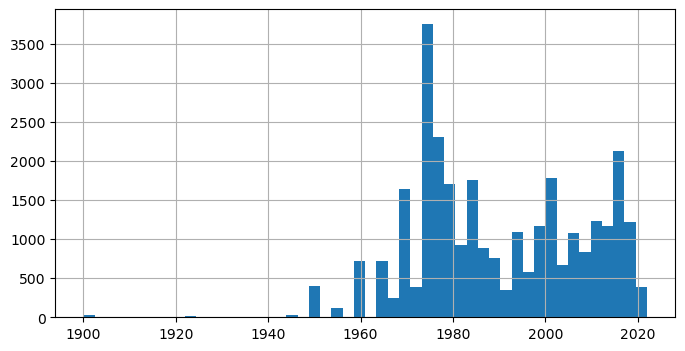

In [14]:
arbres_gre.anneedeplantation.hist(bins=50, figsize=(8,4))
plt.show()

In [15]:
arbres_gre.describe()

,adr_secteur,anneedeplantation,longitude,latitude
count,30144.000000,30144.000000,30144.000000,30144.000000
mean,3.828722,1990.018644,45.177280,5.727445
std,1.706830,17.992314,0.011999,0.012782
min,1.000000,1900.000000,45.151572,5.697915
25%,2.000000,1975.000000,45.166299,5.717668
50%,4.000000,1987.000000,45.175925,5.729491
75%,5.000000,2006.000000,45.187461,5.737417
max,6.000000,2022.000000,45.224825,5.798704


In [16]:
arbres_pkl = arbres_gre.to_pickle("../ML1/arbres-grenoble.pkl")

_________________

In [17]:
arbres_pkl = pd.read_pickle('../ML1/arbres-grenoble.pkl')

In [18]:
arbres_pkl

,sous_categorie_desc,code_parent_desc,adr_secteur,bien_reference,genre_bota,espece,variete,stadededeveloppement,anneedeplantation,raisondeplantation,collectivite,hauteurarbre,portarbre,structure,typenature,longitude,latitude
0,Arbre de voirie,Av J O Poterne rond point,5,AR11324,Robinia,pseudoacacia,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175674,5.749421
1,Arbre de voirie,Av J O Poterne rond point,5,AR27796,Acer,campestre,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,NaN,NaN,Métropole de Grenoble,NaN,45.175689,5.749450
2,Arbre d'espaces ouverts,Av J O caisse d'épargne,5,AR4323,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.175403,5.748483
3,Arbre d'espaces ouverts,Av J O caisse d'épargne,5,AR7132,Fraxinus,americana,NaN,Arbre adulte,1975.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.175424,5.748558
4,Arbre d'espaces ouverts,R M Riollet cité rouge,5,AR15162,Prunus,avium,NaN,Arbre adulte,2009.0,NaN,Ville de Grenoble,Moins de 10 m,NaN,Ville de Grenoble,NaN,45.177608,5.749357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,Arbre de voirie,Allée des Romantiques pair,6,AR27355,Betula,utilis,NaN,Arbre adulte,2011.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.166626,5.725421
31732,Arbre de voirie,Ave La Bruyère pair,6,AR27356,Pyrus,calleryana,Chanticleer,Arbre jeune,2004.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Libre,Métropole de Grenoble,Libre,45.166508,5.724994
31733,Arbre de voirie,R Pupin Ma Oisans à R François,6,AR27357,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Grenoble Alpes Métropole,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,Semi-libre,45.164310,5.723866
31734,Arbre de voirie,R Pupin du tunnel à Esmonin,6,AR27358,Platanus,acerifolia,NaN,Arbre adulte,1976.0,NaN,Ville de Grenoble,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,45.160543,5.723836


In [19]:
arbres_pkl.columns

Index(['sous_categorie_desc', 'code_parent_desc', 'adr_secteur',
       'bien_reference', 'genre_bota', 'espece', 'variete',
       'stadededeveloppement', 'anneedeplantation', 'raisondeplantation',
       'collectivite', 'hauteurarbre', 'portarbre', 'structure', 'typenature',
       'longitude', 'latitude'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(arbres_pkl, test_size=0.2, random_state=42)
#>> Sort 2 outputs (dans ce dataset il y a la target dedans)

y = arbres_pkl['anneedeplantation']
X = arbres_pkl.drop('anneedeplantation', axis = 1)
# Sort 4 outputs (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(train_set))
print(len(test_set))

24115
6029


In [22]:
arbres_pkl.columns

Index(['sous_categorie_desc', 'code_parent_desc', 'adr_secteur',
       'bien_reference', 'genre_bota', 'espece', 'variete',
       'stadededeveloppement', 'anneedeplantation', 'raisondeplantation',
       'collectivite', 'hauteurarbre', 'portarbre', 'structure', 'typenature',
       'longitude', 'latitude'],
      dtype='object')

In [30]:
from sklearn.compose import make_column_selector
#numerical_features = ['adr_secteur', 'longitude', 'latitude']
numerical_features = make_column_selector(dtype_include=np.number)

# categorical_features = ['sous_categorie_desc', 'code_parent_desc', 
#                         'bien_reference', 'genre_bota', 'espece', 'variete',
#                         'stadededeveloppement', 'raisondeplantation',
#                         'collectivite', 'hauteurarbre', 'portarbre', 
#                         'structure', 'typenature']
categorical_features = make_column_selector(dtype_exclude=np.number)

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import SGDClassifier

In [32]:
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

In [39]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                      (categorical_pipeline, categorical_features))

In [43]:
full_pipeline = ColumnTransformer([("num", numerical_pipeline, numerical_features),
                                    ("cat", categorical_pipeline, categorical_features)])

In [51]:
#Fit toujours sur les données d'entrainement (jamais sur les données de test)

X_train_pipe = preprocessor.fit_transform(X_train)
X_train_pipe

<24115x26182 sparse matrix of type '<class 'numpy.float64'>'
	with 385840 stored elements in Compressed Sparse Row format>

In [50]:
#Transform toujours sur donnes de Test
#
X_test_pipe = preprocessor.transform(X_test)

ValueError: Found unknown categories ['Prc Pompidou bassin', 'R de Sault', 'R Vendres', 'R Fourrier n 2bis', 'Ec Ampère n 59 R du Drac', 'R L Jouhaux n 102', 'Jard Hoche entrée R H Ding', 'R de Bonne ang R Guétal'] in column 1 during transform

In [34]:

model = make_pipeline(preprocessor, SGDClassifier(loss='log_loss'))
#model.fit(X, y)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2A9CB3F10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2A98CDC10>)])),
                ('sgdclassifier', SGDClassifier(loss='log_loss'))])

In [ ]:
fit_transform sur x train
transform xtest